In [248]:
#Suja Basnet
#AI in medical Imaging
#Project1

In [370]:
#importing necessary libraries
import glob
import keras
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style  as style
from tqdm  import tqdm
from keras import backend as K
from sklearn.metrics     import accuracy_score, roc_auc_score
from keras.layers        import Dense, Dropout, Flatten, BatchNormalization, GlobalMaxPooling2D
from keras.models        import Sequential, Model, load_model
from keras.callbacks     import ModelCheckpoint,ReduceLROnPlateau, CSVLogger
from keras.activations   import elu
from keras.engine        import Layer, InputSpec
from keras.optimizers    import Adam
from keras.preprocessing import image
from sklearn.model_selection   import train_test_split
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
from IPython.display import display, Math, Latex
from PIL import Image

In [371]:
import os
os.listdir('/Users/sujabasnet/Desktop/USD-courses/AI in medical imaging/Project 1/MontgomerySet/')


['Untitled1.ipynb',
 '.DS_Store',
 'Neg',
 'Untitled.ipynb',
 'CXR_png',
 'ManualMask',
 'ClinicalReadings',
 'NLM-MontgomeryCXRSet-ReadMe.pdf',
 'Pos',
 'Finaltry.ipynb',
 '.ipynb_checkpoints',
 'Data']

In [372]:
mont_list = os.listdir('/Users/sujabasnet/Desktop/USD-courses/AI in medical imaging/Project 1/MontgomerySet/CXR_png')

In [373]:
data = pd.DataFrame(mont_list, columns=['image_id'])
print(df_m.head())
data = df_m[df_m['image_id'] != 'Thumbs.db']#check
data.reset_index(inplace=True, drop=True)
print(df_m.shape)


            image_id        target
0  MCUCXR_0023_0.png        Normal
1  MCUCXR_0383_1.png  Tuberculosis
2  MCUCXR_0103_0.png        Normal
3  MCUCXR_0162_1.png  Tuberculosis
4  MCUCXR_0082_0.png        Normal
(138, 2)


In [374]:
#finding data
def find(x):
    i = int(x[-5])
    if i == 0:
        return 'Normal'
    if i == 1:
        return 'Tuberculosis'

In [375]:
data['target'] = data['image_id'].apply(find)
#concatenate
df_total = pd.concat([data], axis=0).reset_index(drop=True)
#shuffling data
df_total = df_total.sample(frac=1)

In [376]:
print(df_total['target'].value_counts())


Normal          80
Tuberculosis    58
Name: target, dtype: int64


In [377]:
df_total.head()

,image_id,target
77,MCUCXR_0090_0.png,Normal
119,MCUCXR_0254_1.png,Tuberculosis
52,MCUCXR_0002_0.png,Normal
98,MCUCXR_0069_0.png,Normal
137,MCUCXR_0097_0.png,Normal


In [378]:
df_total = pd.get_dummies(df_total, columns=['target'])
df_total.head()

,image_id,target_Normal,target_Tuberculosis
77,MCUCXR_0090_0.png,1,0
119,MCUCXR_0254_1.png,0,1
52,MCUCXR_0002_0.png,1,0
98,MCUCXR_0069_0.png,1,0
137,MCUCXR_0097_0.png,1,0


In [379]:
df_total=df_total.drop(columns=['target_Tuberculosis'])
df_total = df_total.rename(columns={'target_Normal': 'label'})
print(df_total.head())

              image_id  label
77   MCUCXR_0090_0.png      1
119  MCUCXR_0254_1.png      0
52   MCUCXR_0002_0.png      1
98   MCUCXR_0069_0.png      1
137  MCUCXR_0097_0.png      1


Histogram Equalization

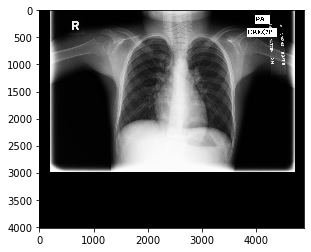

In [380]:
img = Image.open('/Users/sujabasnet/Desktop/USD-courses/AI in medical imaging/Project 1/MontgomerySet/CXR_png/MCUCXR_0080_0.png')
plt.imshow(img, cmap='gray')


(array([9975285.,  322692.,  188323.,  159442.,  195958.,  253775.,
         312569.,  338319.,  350165.,  325293.,  377286.,  305239.,
         274295.,  229191.,  205509.,  214816.,  217825.,  197934.,
         185414.,  167629.,  197411.,  161163.,  147610.,  141283.,
         136494.,  128767.,  134287.,  144739.,  155143.,  167080.,
         203031.,  165386.,  158865.,  167040.,  155276.,  136894.,
         126056.,  121428.,  108747.,  101987.,  111738.,   99991.,
         118088.,  133845.,  138813.,  158386.,  167227.,  181049.,
         259782.,  541275.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <a list of 50 Patc

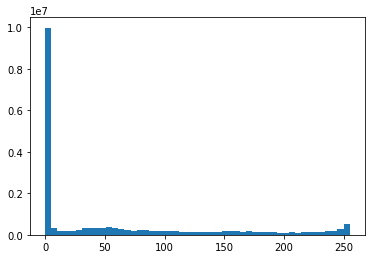

In [381]:
# convert image into a numpy array
img = np.asarray(img)

#put pixels in a 1D array by flattening out img array
flat = img.flatten()

# show the histogram
plt.hist(flat, bins=50)

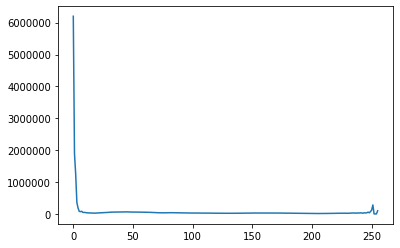

In [382]:
# create our own histogram function
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

hist = get_histogram(flat, 256)

plt.plot(hist)


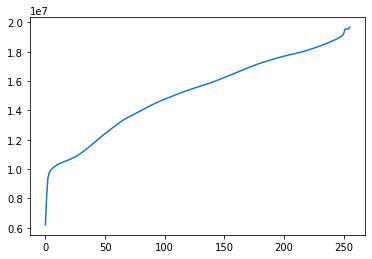

In [383]:
# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(hist)

# display the result
plt.plot(cs)


(array([6198707.,       0.,       0.,       0.,       0.,       0.,
              0., 1889317.,       0.,       0.,       0., 1252262.,
              0.,  549545.,  304785.,  291684.,  270155.,  282348.,
         240866.,  260203.,  275745.,  280911.,  262036.,  252645.,
         310525.,  241307.,  263769.,  305181.,  251539.,  262452.,
         272977.,  278000.,  262516.,  272264.,  275059.,  265113.,
         271945.,  268003.,  267494.,  292493.,  245424.,  279782.,
         277397.,  262155.,  268376.,  279492.,  239174.,  300919.,
         130115.,  411160.]),
 array([ 6198707.  ,  6468049.66,  6737392.32,  7006734.98,  7276077.64,
         7545420.3 ,  7814762.96,  8084105.62,  8353448.28,  8622790.94,
         8892133.6 ,  9161476.26,  9430818.92,  9700161.58,  9969504.24,
        10238846.9 , 10508189.56, 10777532.22, 11046874.88, 11316217.54,
        11585560.2 , 11854902.86, 12124245.52, 12393588.18, 12662930.84,
        12932273.5 , 13201616.16, 13470958.82, 13740301.48, 1

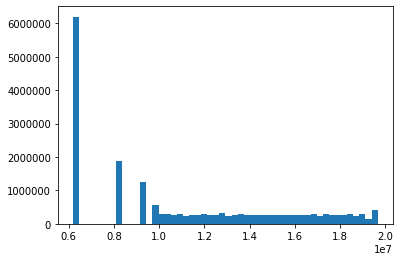

In [384]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[flat]

# we see a much more evenly distributed histogram
plt.hist(img_new, bins=50)

In [385]:
# put array back into original shape since we flattened it
img_new = np.reshape(img_new, img.shape)
img_new

array([[6198707., 6198707., 6198707., ..., 6198707., 6198707., 6198707.],
       [6198707., 6198707., 6198707., ..., 6198707., 6198707., 6198707.],
       [6198707., 6198707., 6198707., ..., 6198707., 6198707., 6198707.],
       ...,
       [6198707., 6198707., 6198707., ..., 6198707., 6198707., 6198707.],
       [6198707., 6198707., 6198707., ..., 6198707., 6198707., 6198707.],
       [6198707., 6198707., 6198707., ..., 6198707., 6198707., 6198707.]])

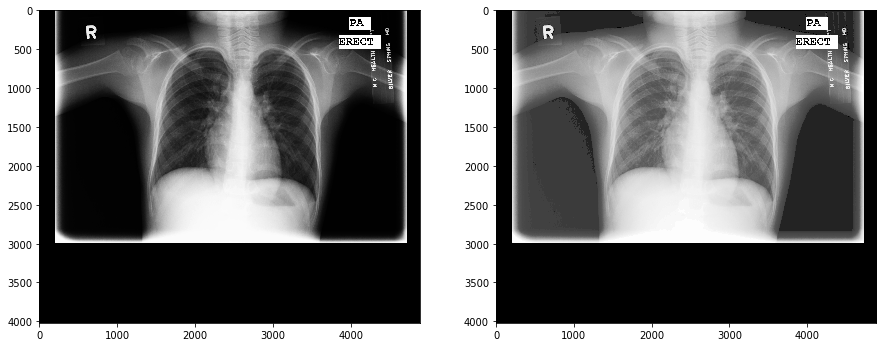

In [386]:
# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True)

Train and test Split

In [387]:
startifyparameter = df_total['label']
#startify splits data in proportion of startify parameter
df_train, df_val = train_test_split(df_m, test_size=0.20, random_state=42, stratify= startifyparameter)

print(df_train.shape)
print(df_val.shape)

(110, 2)
(28, 2)


In [388]:
# Create a new directory
base_dir = 'base_img'
os.mkdir(base_dir)

# create a path to 'base_dir' to which we will join the names of the new folders
# train_dir
train_dir = os.path.join(base_dir, 'train_img')
os.mkdir(train_dir)



Normal = os.path.join(train_dir, 'Normal')
os.mkdir(Normal)
Tuberculosis = os.path.join(train_dir, 'Tuberculosis')
os.mkdir(Tuberculosis)

# val_dir
val_dir = os.path.join(base_dir, 'val_img')
os.mkdir(val_dir)

Normal = os.path.join(val_dir, 'Normal')
os.mkdir(Normal)
Tuberculosis = os.path.join(val_dir, 'Tuberculosis')
os.mkdir(Tuberculosis)



In [389]:
df_total.set_index('image_id', inplace=True)


In [390]:
import cv2
# Get a list of images in folder
folder_1 = os.listdir('/Users/sujabasnet/Desktop/USD-courses/AI in medical imaging/Project 1/MontgomerySet/CXR_png')


# Get a list of train images
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])





In [391]:
# Transfer the train images

for image in train_list:
    
    fname = image
    label = df_total.loc[image,'label']
    if label == 1:
        label= 'Normal'
    else:
        label= 'Tuberculosis'
    
    if fname in folder_1:
        # source path to image
        src = os.path.join('/Users/sujabasnet/Desktop/USD-courses/AI in medical imaging/Project 1/MontgomerySet/CXR_png', fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        
        image = cv2.imread(src)
        image = cv2.resize(image, (96,96))
        # save the image at the destination
        cv2.imwrite(dst, image)
        
for image in val_list:
    
    fname = image
    label = df_total.loc[image,'label']
    if label == 1:
        label= 'Normal'
    else:
        label= 'Tuberculosis'
    
    if fname in folder_1:
        # source path to image
        src = os.path.join('/Users/sujabasnet/Desktop/USD-courses/AI in medical imaging/Project 1/MontgomerySet/CXR_png', fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        
        image = cv2.imread(src)
        image = cv2.resize(image, (96,96))
        # save the image at the destination
        cv2.imwrite(dst, image)
        

In [392]:
print(len(os.listdir('base_img/train_img/Normal')))
print(len(os.listdir('base_img/train_img/Tuberculosis')))

60
50


In [393]:
print(len(os.listdir('base_img/val_img/Normal'))) 
print(len(os.listdir('base_img/val_img/Tuberculosis')))

20
8


In [394]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0/255)

train_gen = datagen.flow_from_directory('base_img/train_img',
                                        target_size=(96,96),
                                        batch_size= 10,
                                        class_mode='categorical',
                                        follow_links=True)


Found 110 images belonging to 2 classes.


In [395]:
val_gen = datagen.flow_from_directory('base_img/val_img',
                                        target_size=(96,96),
                                        batch_size= 10,
                                        class_mode='categorical',
                                        follow_links =True)

Found 28 images belonging to 2 classes.


Neural Network

In [396]:
cnn = keras.models.Sequential()

In [397]:
cnn.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[96, 96, 3]))
cnn.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(Dropout(0.3))

cnn.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(Dropout(0.25))

cnn.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(Dropout(0.25))


In [398]:
cnn.add(keras.layers.Dense(units=250, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(keras.layers.Dense(units=2, activation = "softmax"))


In [399]:
cnn.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 94, 94, 32)        896       
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 92, 92, 32)        9248      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 46, 46, 32)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 44, 44, 32)        9248      
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 42, 42, 32)        9248      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 21, 21, 32)       